In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('game data.csv')

In [3]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [4]:
df = df.drop(['Days'], axis=1)

In [5]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [6]:
df.isnull().sum() 

Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [8]:
df.value_counts()

Outlook  Temprature  Routine  Wear Jacket?
Cloudy   Cold        Indoor   Yes             1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Sunny    Cold        Indoor   No              1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
dtype: int64

In [9]:
df['Outlook'].value_counts()

Sunny     4
Cloudy    4
Name: Outlook, dtype: int64

In [10]:
df['Routine'].value_counts()

Indoor     4
Outdoor    4
Name: Routine, dtype: int64

In [11]:
df['Temprature'].value_counts() 

Cold    4
Warm    4
Name: Temprature, dtype: int64

In [12]:
x = df.drop(['Wear Jacket?'], axis=1)
y = df[['Wear Jacket?']]

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [15]:
#alda alda kore korte paren.... you have this right.

[Lambda](https://youtu.be/MvWMpCK5ZHM?list=PLKdU0fuY4OFf7qj4eoBtvALAB_Ml2rN0V)

In [16]:
x[['Outlook', 'Temprature', 'Routine']] = x[['Outlook', 'Temprature', 'Routine']].apply(lambda col: le.fit_transform(col)) #lambda arguments: expression

In [17]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [18]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


Outlook -> 'Cloudy':0 , 'Sunny': 1 <br>
Temperature -> 'Cold':0, 'Warm':1  <br>
Routine-> 'Indoor ':0, 'Outdoor':1 <br>

# Decision Tree Classifier

Sklearn: [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [19]:
from sklearn.tree import DecisionTreeClassifier 

In [20]:
clf = DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.fit(x,y) # all natok done in one line code

DecisionTreeClassifier(criterion='entropy')

In [22]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [23]:
clf.predict([[0,0,1]])

array(['Yes'], dtype=object)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

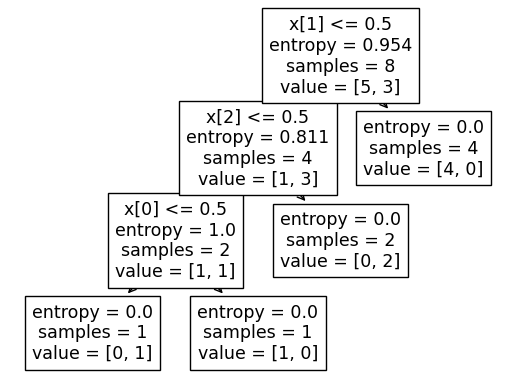

In [24]:
tree.plot_tree(clf)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

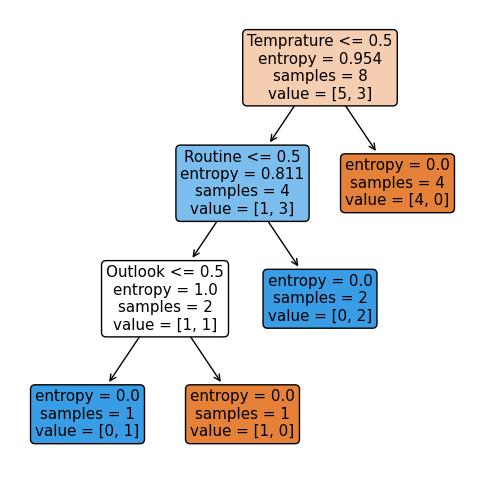

In [25]:
plt.figure(figsize=(6,6))
tree.plot_tree(clf,feature_names=x.columns, filled=True, rounded=True )

In [29]:
clf2 = DecisionTreeClassifier(criterion='entropy')

In [30]:
clf2.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.875, 'Temprature <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

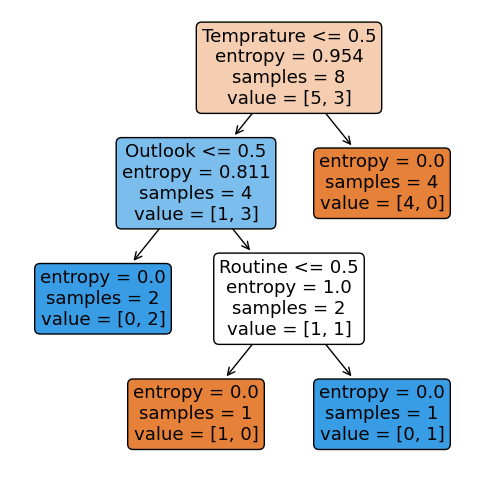

In [31]:
plt.figure(figsize=(6,6))
tree.plot_tree(clf2,feature_names=x.columns, filled=True, rounded=True )